# HDI - highest density interval

* 黒木玄
* 2022-08-06
* License: https://opensource.org/licenses/MIT

In [1]:
using Distributions
using Roots
using StatsPlots
default(fmt=:png, size=(400, 250))

In [2]:
"""
    invpdf(dist, y; alg = Order0(), modefunc = mymode)

`dist` は最頻値を持つ単峰型の連続分布であると仮定する.

この函数はその分布の最頻値の左側と右側での pdf の逆函数の `y` における値達のタプルを返す.
"""
function invpdf(dist, y; alg = Order0(), modefunc = mymode)
    m = modefunc(dist)
    cdfm = cdf(dist, m)
    a0 = quantile(dist, cdfm/2)
    b0 = quantile(dist, 1 - (1 - cdfm)/2)
    f(x) = logpdf(dist, x) - log(y)
    a = m == minimum(dist) ? minimum(dist) : find_zero(f, a0, alg)
    b = m == maximum(dist) ? maximum(dist) : find_zero(f, b0, alg)
    a, b
end

"""
    mymode(x)

適当に修正された `mode(x)`.
"""
mymode(x) = mode(x)

function mymode(beta::Beta)
    α, β = params(beta)
    α == 1 && β == 1 && return median(beta)
    α == 1 && β > 1 && return mininmum(beta)
    α > 1 && β == 1 && return maximum(beta)
    mode(beta)
end

@doc invpdf

```
invpdf(dist, y; alg = Order0(), modefunc = mymode)
```

`dist` は最頻値を持つ単峰型の連続分布であると仮定する.

この函数はその分布の最頻値の左側と右側での pdf の逆函数の `y` における値達のタプルを返す.


In [3]:
@doc mymode

```
mymode(x)
```

適当に修正された `mode(x)`.


In [4]:
dist = Normal()
invpdf(dist, pdf(dist, mode(dist))/2)

(-1.1774100225154747, 1.1774100225154747)

In [5]:
dist = Gamma(2, 3)
invpdf(dist, pdf(dist, mode(dist))/2)

(0.6958828589596029, 8.035040970049984)

In [6]:
dist = Gamma(2, 3)
invpdf(dist, 0.05)

(0.5384738050439544, 8.980784960323133)

In [7]:
dist = Exponential()
invpdf(dist, 0.1)

(0.0, 2.3025850929940455)

In [8]:
dist = Beta(5, 1)
invpdf(dist, 0.1)

(0.37606030930863943, 1.0)

In [9]:
"""
    cdfinvpdf(dist, y; alg = Order0())

`dist` は `mode(dist)` を持つ単峰型の連続分布であると仮定する.

この函数はその分布の左側と右側での pdf の逆函数の `y` における値達のあいだの区間の確率の値を返す.

"""
function cdfinvpdf(dist, y; alg = Order0())
    a, b = invpdf(dist, y; alg)
    cdf(dist, b) - cdf(dist, a)
end

@doc cdfinvpdf

```
cdfinvpdf(dist, y; alg = Order0())
```

`dist` は `mode(dist)` を持つ単峰型の連続分布であると仮定する.

この函数はその分布の左側と右側での pdf の逆函数の `y` における値達のあいだの区間の確率の値を返す.


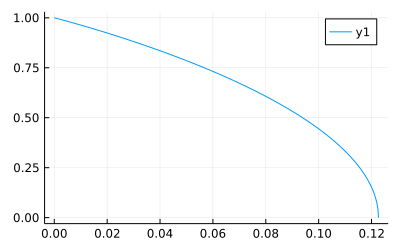

In [10]:
dist = Gamma(2, 3)
m = mode(dist)
pdfm = pdf(dist, m)
plot(y -> cdfinvpdf(dist, y), eps(), pdfm)

In [11]:
"""
    hdi(dist, α = 0.05; alg = Order0(), modefunc = mymode)

`dist` は `mode(dist)` を持つ単峰型の連続分布であると仮定する.

この函数はその分布の100(1-α)% HDI (highest density interval)を返す.
"""
function hdi(dist, α = 0.05; alg = Order0(), modefunc = mymode)
    pdfm = pdf(dist, modefunc(dist))
    y = find_zero(pdfm/2, alg) do y
        cdfinvpdf(dist, y; alg) - (1 - α)
    end
    invpdf(dist, y; alg)
end

@doc hdi

```
hdi(dist, α = 0.05; alg = Order0(), modefunc = mymode)
```

`dist` は `mode(dist)` を持つ単峰型の連続分布であると仮定する.

この函数はその分布の100(1-α)% HDI (highest density interval)を返す.


In [12]:
function plot_hdi(dist, α = 0.05; alg=Order0(), kwargs...)
    @show α
    @show a, b = hdi(dist, α; alg)
    plot(dist; label="pdf")
    vline!([a, b]; label="hdi")
    plot!(; kwargs...)
end

plot_hdi (generic function with 2 methods)

α = 0.05
(a, b) = hdi(dist, α; alg) = (-1.9599639845400534, 1.9599639845400536)


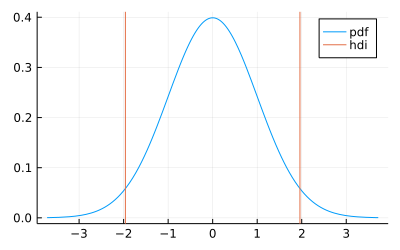

In [13]:
plot_hdi(Normal())

α = 0.05
(a, b) = hdi(dist, α; alg) = (12.876247680835615, 48.91085020767211)


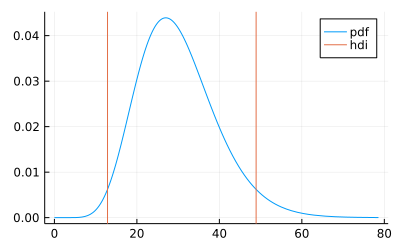

In [14]:
plot_hdi(Gamma(10, 3))

α = 0.05
(a, b) = hdi(dist, α; alg) = (0.0, 2.99573227355399)


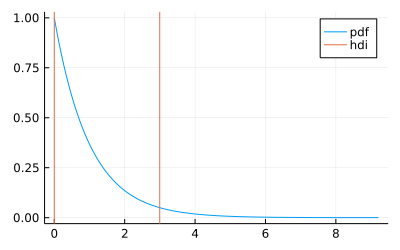

In [15]:
plot_hdi(Exponential())

α = 0.05
(a, b) = hdi(dist, α; alg) = (4.29208256027854, 16.3036167358907)


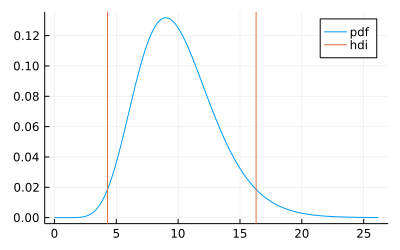

In [16]:
plot_hdi(Gamma(10, 1))

α = 0.05
(a, b) = hdi(dist, α; alg) = (0.11458418805676886, 0.5639440159142496)


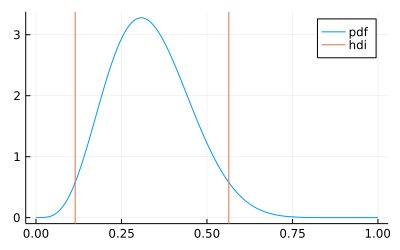

In [17]:
plot_hdi(Beta(5, 10))

α = 0.05
(a, b) = hdi(dist, α; alg) = (0.5492802716530589, 1.0)


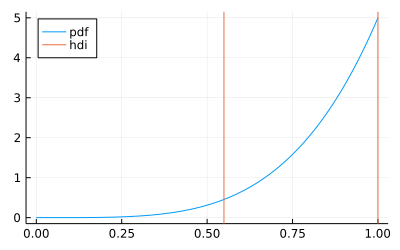

In [18]:
plot_hdi(Beta(5, 1); legend=:topleft)